## Sentiment Analysis on Amazon Reviews

---

Student Name: Almoatasam Yousuf Rashid AL-Dhahli

Student ID: S1638700

Supervisor: James Paterson

---

## Steps Involved
- Data Loading and Data Cleaning
- Exploratory Data Vizualization
- Text Pre-processing (NLP)
- Sentiment Classifcation and Prediction- "Positive", "Negative","Neutral"
- Building and Validation of Model for Sentiment Prediction- (Comparison of Algorithms such as KNN, SVC, Random Forest, Decision Tree, Adaboost, GNB etc.)
- Building a optimised Model for Sentiment Classification

#### Import the required libraries and dependencies 

cd where/I/put/amazeviews
scrapy crawl reviews -a book=25482121,1215485,121548,... -o file_name.csv

In [2]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import nltk
import re as regex
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import gensim
from sklearn import metrics
from sklearn.pipeline import Pipeline
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

import codecs
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import re
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pylab
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)
from textblob import TextBlob
import seaborn
from wordcloud import WordCloud, STOPWORDS 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

Populating the interactive namespace from numpy and matplotlib


# Load the dataset

In [3]:
df = pd.read_csv("phone_reviews.csv")
len(df)

35138

B00CL4HUSI, B005ZD6WQS, B071HWTHPH, B071P2FNF2, B01BD8G3W6, B071LHJWDY, B078BN2H39, B01NAKU37U

In [4]:
df.head()

tld     book_id          amz_id      author_name  rating                                         author_url                                               text
0  co.uk  B005ZD6WQS   RZGJ30KFZYWWQ          Julie L       4  https://www.amazon.co.uk/gp/profile/amzn1.acco...  If you are looking for a cheap phone that work...
1  co.uk  B005ZD6WQS  R32CR5MFXC9NSN       Sarah Wood       5  https://www.amazon.co.uk/gp/profile/amzn1.acco...  Brought this phone for my Dad as he broke his ...
2  co.uk  B005ZD6WQS   R7BDK8WADBMRQ  Amazon Customer       1  https://www.amazon.co.uk/gp/profile/amzn1.acco...  Not happy with the iphone4 but then what did e...
3  co.uk  B005ZD6WQS  R3BXAEGMEKE97I  Kindle Customer       5  https://www.amazon.co.uk/gp/profile/amzn1.acco...  Bought earlier in the year and it is still goi...
4  co.uk  B005ZD6WQS  R1HOWWVZJPW5AA       Johnny Red       5  https://www.amazon.co.uk/gp/profile/amzn1.acco...  Bought second hand as a back up phone for when...

In [5]:
text_df = df[["text"]]

In [6]:
text_df.head()

text
0  If you are looking for a cheap phone that work...
1  Brought this phone for my Dad as he broke his ...
2  Not happy with the iphone4 but then what did e...
3  Bought earlier in the year and it is still goi...
4  Bought second hand as a back up phone for when...

In [7]:
text = text_df.text

#### Get the Sentiments using the TextBlob

In [8]:
def clean_review(review):
        '''
        Utility function to clean text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(review)).split())

In [9]:
clean_review(text)

'0 If you are looking for a cheap phone that work 1 Brought this phone for my Dad as he broke his 2 Not happy with the iphone4 but then what did e 3 Bought earlier in the year and it is still goi 4 Bought second hand as a back up phone for when 5 Very good as described and excellent service 6 fair 7 Grans first phone maybe a older model but look 8 Considering this was a gift for a 10 year old 9 Brilliant Does as it says on the tin Very s 10 Bought2 of these through Vantage Cellular Th 11 I puschased this phone LISTED AS NEW for a C 12 It wasn t only a refurbished item instead of u 13 iPhone is in great shape It had no scratches 14 Phone4 nMy I phone4 arrived as promised The p 15 I paid for a new unlocked iPhone4 but I got 16 As stated in the description the iPhone had l 17 After saving up for several months I was able 18 Great ipod slah phone I like this phone but b 19 Bought what was advertised as an Apple iPhone 20 Handy war kaputt Dh Lautsprecher ging von Beg 21 Erst lange berlegt o

In [10]:
 def get_sentiment(review):
        '''
        Utility function to classify sentiment of passed text
        using textblob's sentiment method
        '''
        # create TextBlob object of passed text
        analysis = TextBlob(clean_review(text))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

### Get the Polarity of the reviews

In [11]:
Polarity = []
for text in df['text']:
    Polarity.append(get_sentiment(text))

In [12]:
text = df['text']
data_sent = {'text': text, 'Polarity': Polarity}
text_data = pd.DataFrame(data=data_sent)
text_data.head()

Polarity                                               text
0  positive  If you are looking for a cheap phone that work...
1  positive  Brought this phone for my Dad as he broke his ...
2  negative  Not happy with the iphone4 but then what did e...
3  positive  Bought earlier in the year and it is still goi...
4  positive  Bought second hand as a back up phone for when...

In [13]:
text_data.Polarity.value_counts()

positive    26813
negative     4256
neutral      4069
Name: Polarity, dtype: int64

In [14]:
text_data.to_csv('iphone_reviews.csv', index = False)

---

Text(0.5,0,u'Sentiment expressed in Customer Reviews')

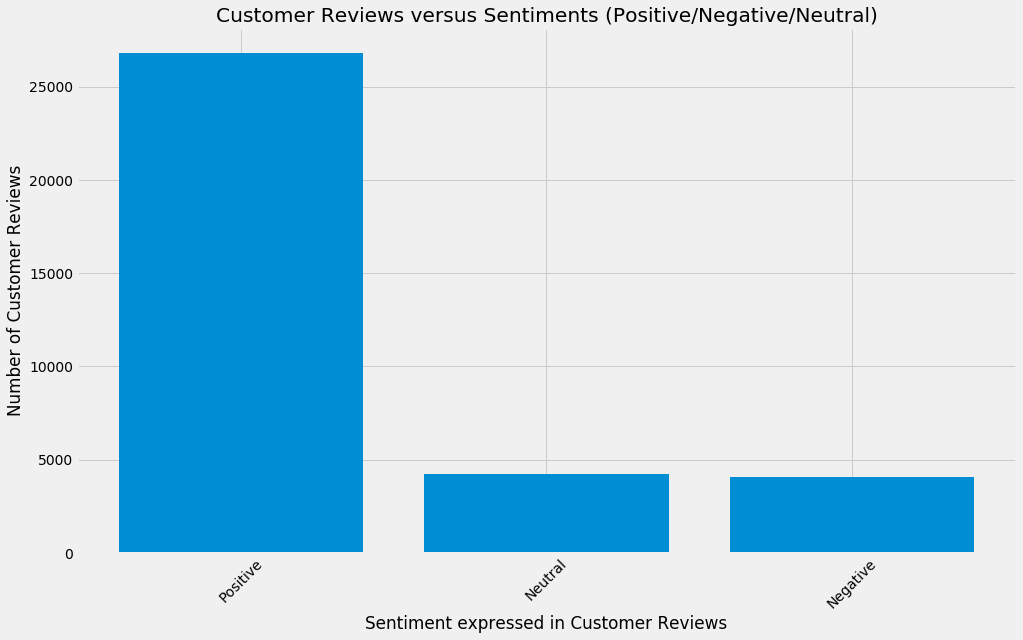

In [15]:
plt.style.use('fivethirtyeight')
Index = [1,2,3]
plt.bar(Index,text_data.Polarity.value_counts())
plt.xticks(Index,['Positive','Neutral', 'Negative'],rotation=45)
plt.title('Customer Reviews versus Sentiments (Positive/Negative/Neutral)')
plt.ylabel('Number of Customer Reviews')
plt.xlabel('Sentiment expressed in Customer Reviews')

In [16]:
df.head()

tld     book_id          amz_id      author_name  rating                                         author_url                                               text
0  co.uk  B005ZD6WQS   RZGJ30KFZYWWQ          Julie L       4  https://www.amazon.co.uk/gp/profile/amzn1.acco...  If you are looking for a cheap phone that work...
1  co.uk  B005ZD6WQS  R32CR5MFXC9NSN       Sarah Wood       5  https://www.amazon.co.uk/gp/profile/amzn1.acco...  Brought this phone for my Dad as he broke his ...
2  co.uk  B005ZD6WQS   R7BDK8WADBMRQ  Amazon Customer       1  https://www.amazon.co.uk/gp/profile/amzn1.acco...  Not happy with the iphone4 but then what did e...
3  co.uk  B005ZD6WQS  R3BXAEGMEKE97I  Kindle Customer       5  https://www.amazon.co.uk/gp/profile/amzn1.acco...  Bought earlier in the year and it is still goi...
4  co.uk  B005ZD6WQS  R1HOWWVZJPW5AA       Johnny Red       5  https://www.amazon.co.uk/gp/profile/amzn1.acco...  Bought second hand as a back up phone for when...

In [17]:
df['rating'].value_counts()

5    16640
4     8684
1     4753
3     3186
2     1875
Name: rating, dtype: int64

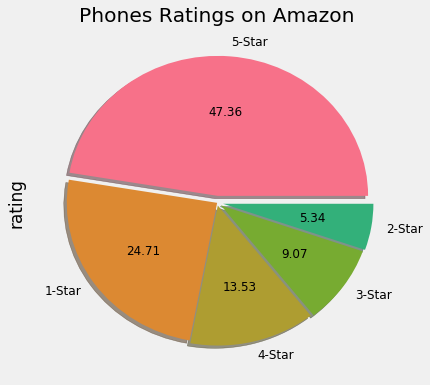

In [18]:
color=seaborn.color_palette("husl", 10)
pd.Series(df["rating"]).value_counts().plot(kind="pie",
                labels=["5-Star", "1-Star", "4-Star","3-Star","2-Star"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Phones Ratings on Amazon")

In [19]:
import sys
reload(sys)  
sys.setdefaultencoding('utf-8')

In [20]:
polar = pd.DataFrame()
n = int(len(text)) 
sen = []
for i in range(n):
    blob = TextBlob(str(text[i]))
    k = blob.sentiment.polarity
    sen.append(k)
polar['polarity'] = sen
polar.head()

polarity
0  0.276190
1  0.283333
2 -0.031250
3  0.444444
4  0.116667

Text(0.5,1,u'Distribution of Polarity of Customer Reviews')

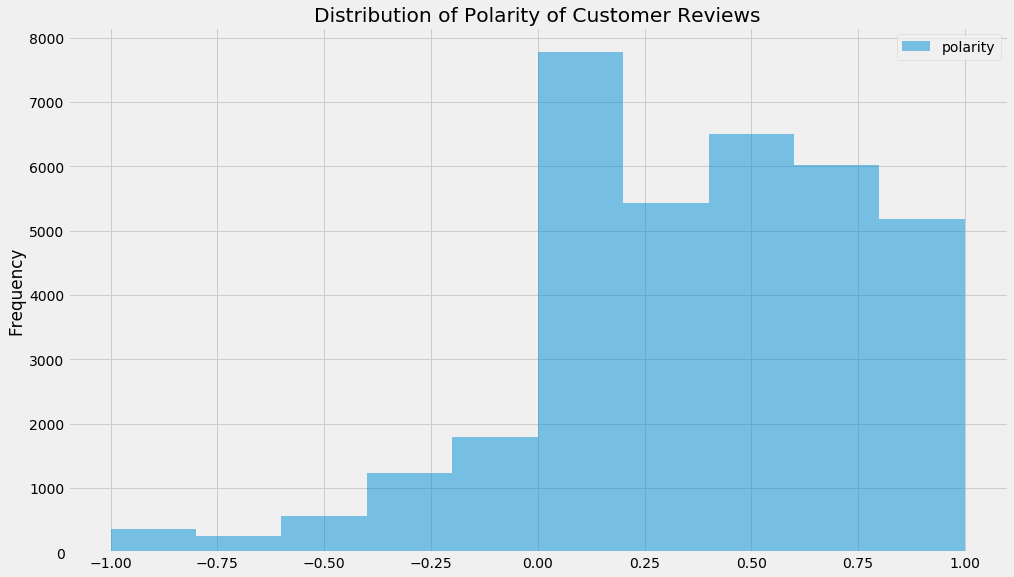

In [21]:
polar.plot.hist(alpha=0.5)
plt.title("Distribution of Polarity of Customer Reviews")

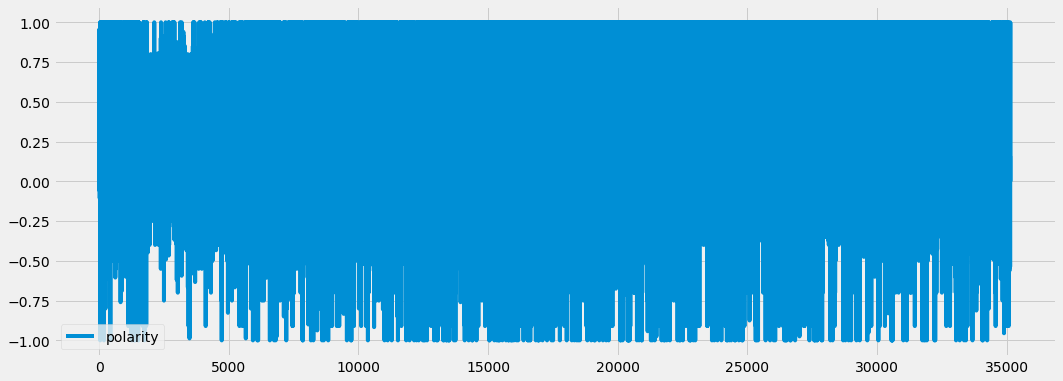

In [22]:
polar.plot.line(x=polar.index,y='polarity',figsize=(16,6))

####  Is there any difference in text length between poitive, negative and neutral reviews?

In [23]:
text_data.groupby('Polarity').describe()

text                             
          count unique              top freq
Polarity                                    
negative   4256   4160         Not good   16
neutral    3960   3701  Value for money   56
positive  26813  22910             Good  580

In [24]:
text_data['length'] = text_data['text'].astype('str').map(lambda text: len(text))
text_data.head()

Polarity                                               text  length
0  positive  If you are looking for a cheap phone that work...     378
1  positive  Brought this phone for my Dad as he broke his ...     451
2  negative  Not happy with the iphone4 but then what did e...     461
3  positive  Bought earlier in the year and it is still goi...      96
4  positive  Bought second hand as a back up phone for when...     237

Text(0.5,1,u'Distibution of Length of Customer Reviews (No. of Customers)')

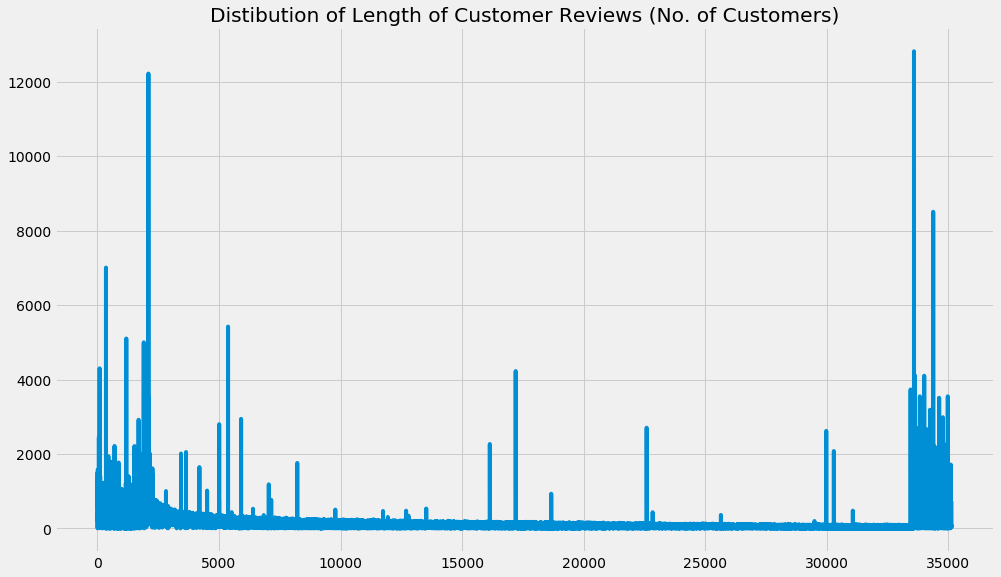

In [25]:
text_data.length.plot.line()
plt.title("Distibution of Length of Customer Reviews (No. of Customers)")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015EDC780>,
      dtype=object)

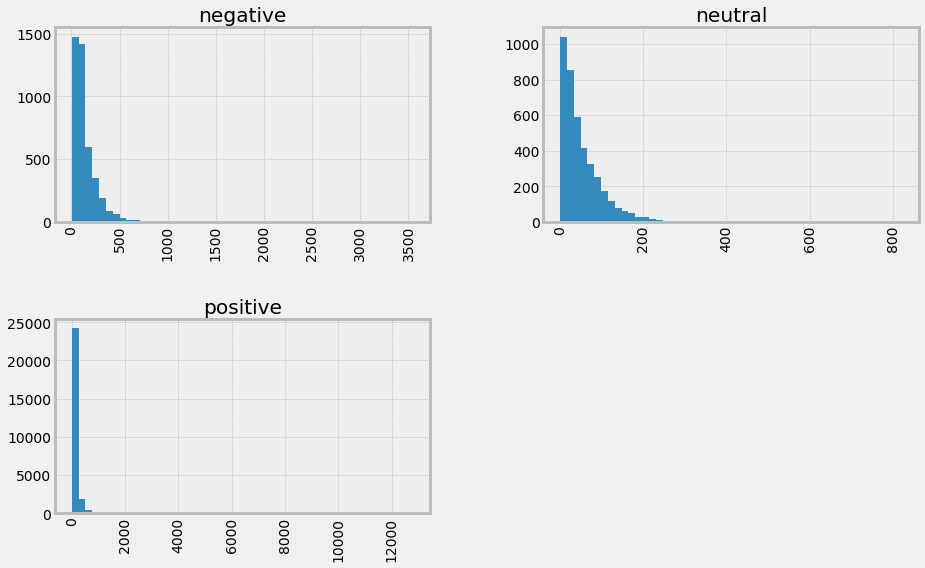

In [26]:
plt.style.use('bmh')
text_data.hist(column='length', by='Polarity', bins=50)

In [27]:
# Now, get the shape of the dataframe
text_data.shape

(35138, 3)

In [28]:
text_data.head()

Polarity                                               text  length
0  positive  If you are looking for a cheap phone that work...     378
1  positive  Brought this phone for my Dad as he broke his ...     451
2  negative  Not happy with the iphone4 but then what did e...     461
3  positive  Bought earlier in the year and it is still goi...      96
4  positive  Bought second hand as a back up phone for when...     237

### Pre- processing

In [29]:
from nltk.corpus import stopwords
import re, string
import nltk

reviews_texts = text_data["text"].tolist()
stopwords=stopwords.words('english')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

In [30]:
## CREATE A FUNCTION THAT WILL PREPROCESS THE DATA
def text_clean(df):
    temp_df = df.copy()
    # Remove hyperlinks
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('https?:\/\/.*\/\w*', '', regex=True)
    # Remove citations
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\@\w*', '', regex=True)
    # Remove tickers
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\$\w*', '', regex=True)
    # Remove punctuation
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('[' + string.punctuation + ']+', '', regex=True)
    # Remove quotes
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\&*[amp]*\;|gt+', '', regex=True)
    # Remove RT
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('RT', '', regex=True)
    # Remove linebreak, tab, return
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('[\n\t\r]+', ' ', regex=True)
    # Remove via with blank
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('via+\s', '', regex=True)
    # Remove multiple whitespace
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\s+\s+', ' ', regex=True)
    # Remove multiple whitespace
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\s+\s+', ' ', regex=True)
    # Remove HashTags 
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\#+[\w_]+[\w\'_\-]*[\w_]+', ' ', regex=True)
    # Remove Smileys
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('[:=]+(|o|O| )+[D\)\]]+[\(\[]+[pP]+[doO/\\]+[\(\[]+(\^_\^|)', ' ', regex=True)
    # Remove empty rows
    temp_df = temp_df.dropna()
    return temp_df

In [31]:
text_clean = text_clean(text_data)

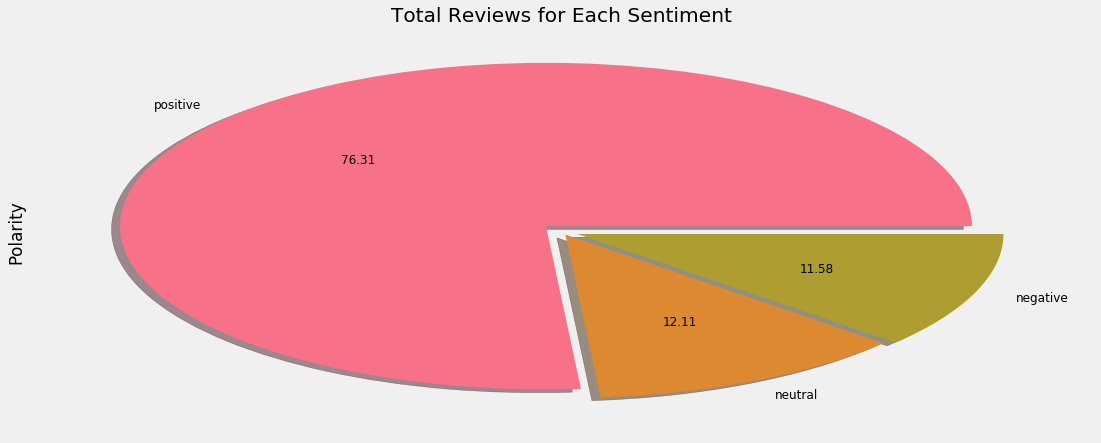

In [32]:
colors=seaborn.color_palette("husl", 10)
pd.Series(text_data["Polarity"]).value_counts().plot(kind="pie",colors=colors,
    labels=["positive", "neutral", "negative"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(17,7),title = "Total Reviews for Each Sentiment")

### Visualization using wordcloud for the negative reviews

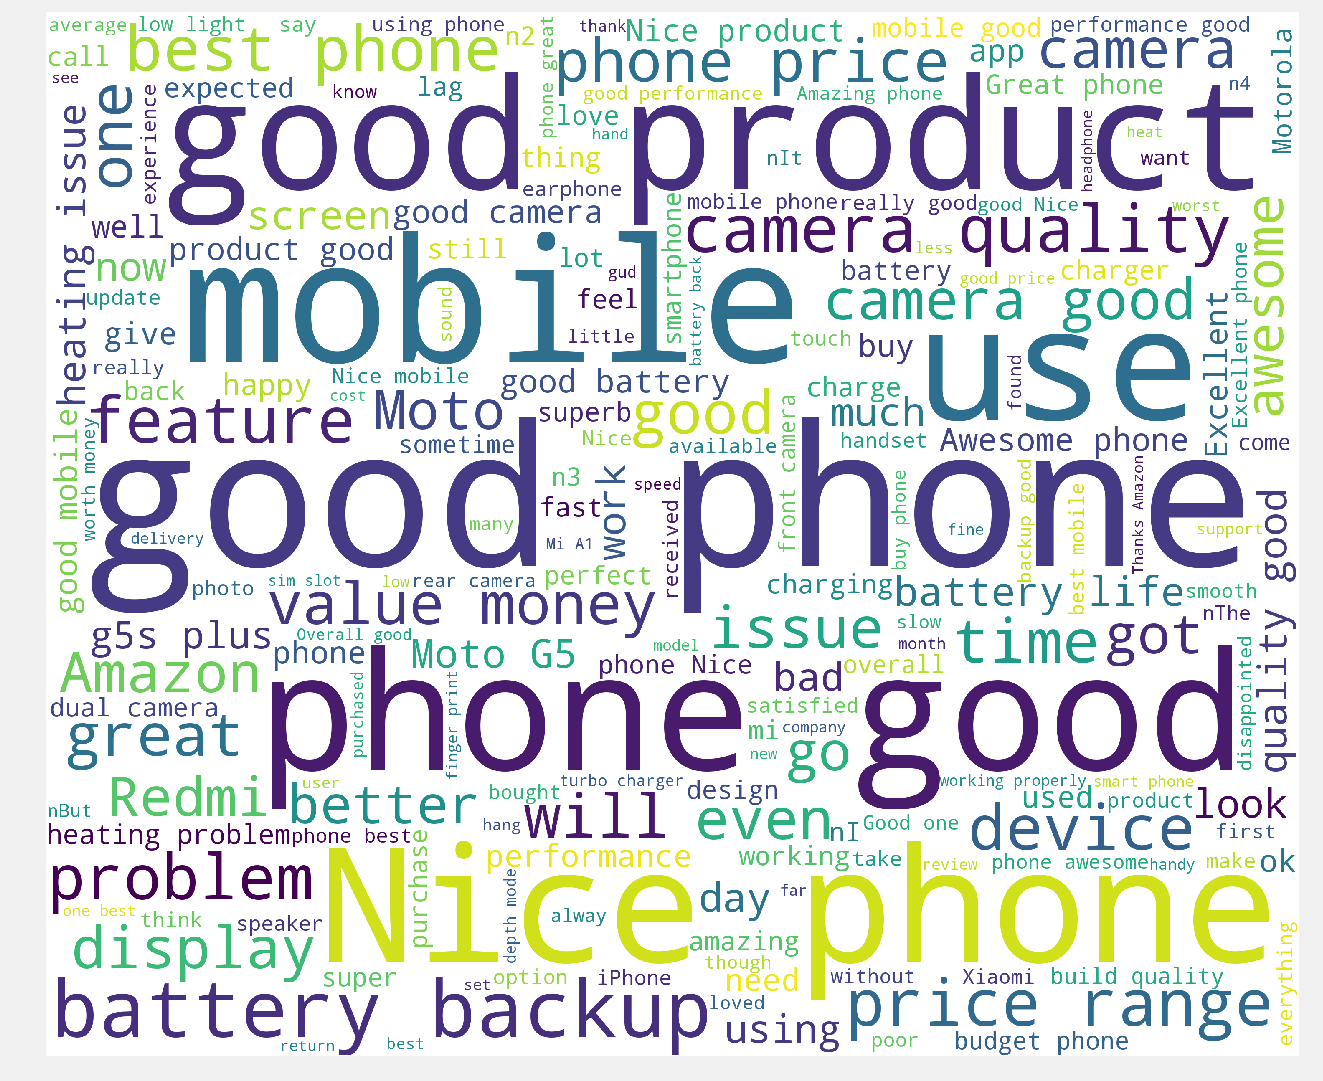

In [33]:
df=text_data[text_data['Polarity']=='negative']
words = ' '.join(text_data['text'].astype(str))
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Visualization using wordcloud for the positive review

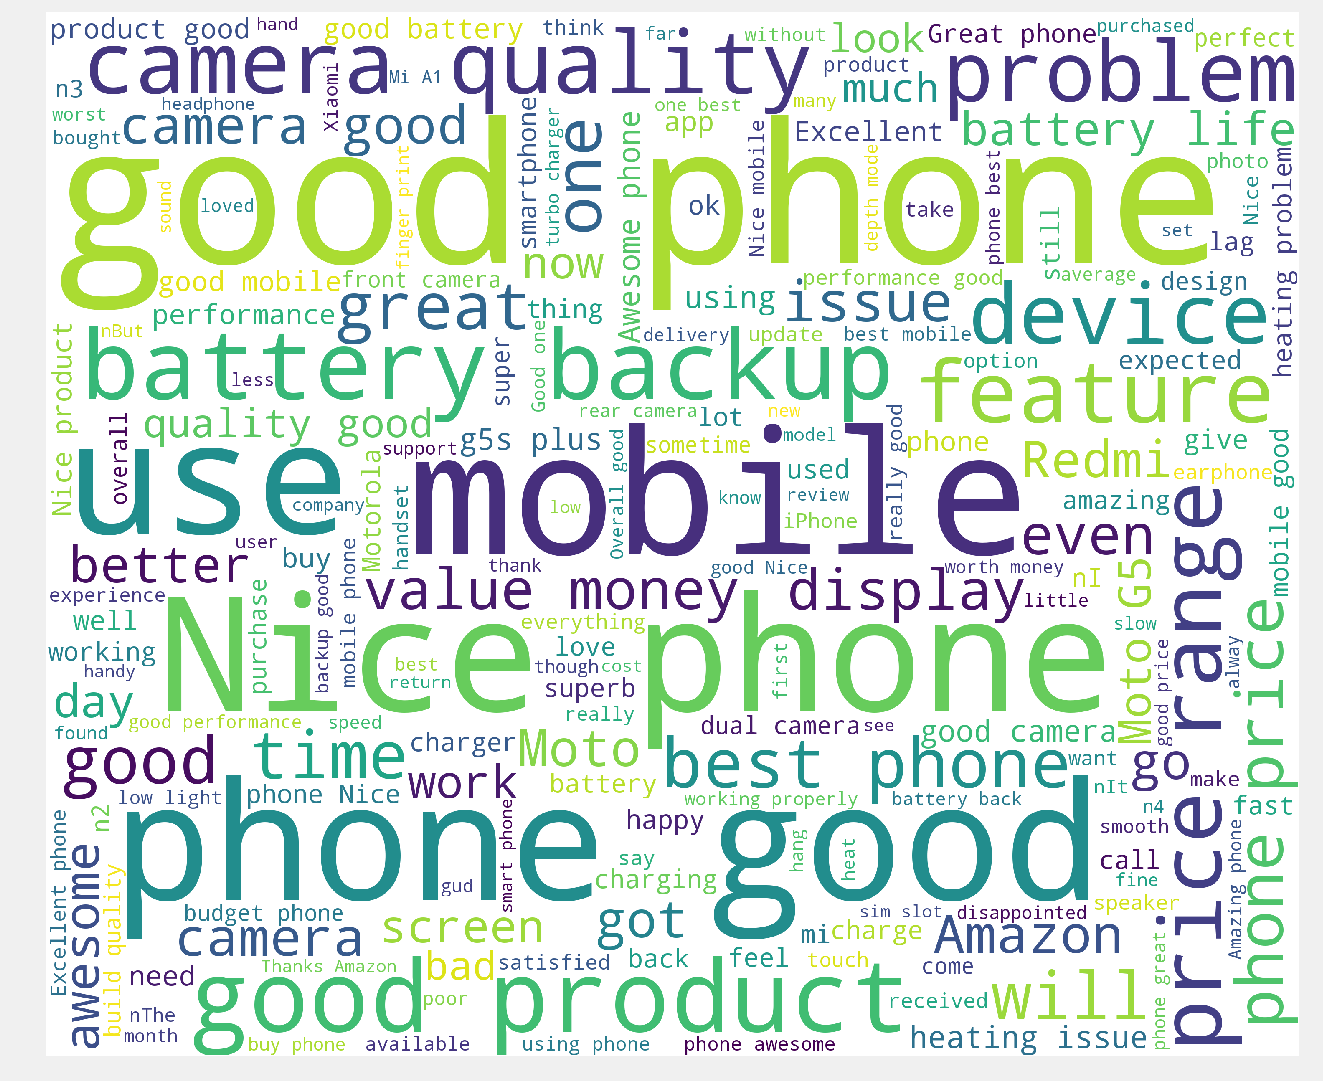

In [34]:
df=text_data[text_data['Polarity']=='positive']
words = ' '.join(text_data['text'].astype(str))
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Visualization using wordcloud for the neutral reviews

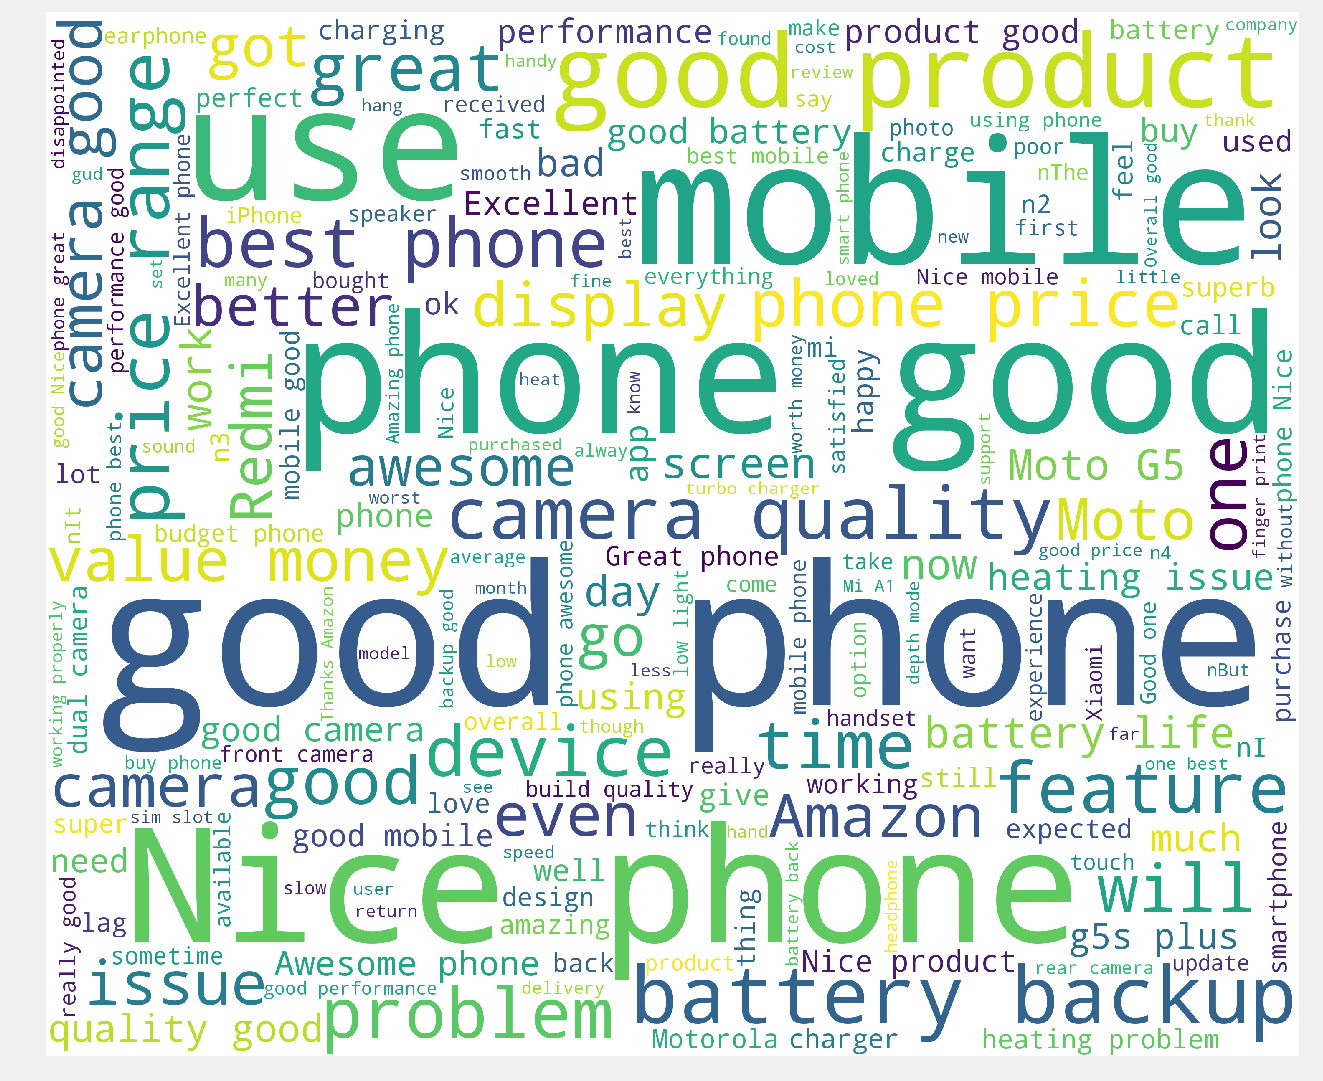

In [35]:
df=text_data[text_data['Polarity']=='neutral']
words = ' '.join(text_data['text'].astype(str))
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Sentiment Classifier

In [36]:
from nltk.corpus import stopwords
def review_to_words(raw_review):
    review = ''.join(c for c in raw_review if c not in string.punctuation)
    review = re.sub('((www\S+)|(http\S+))', 'urlsite', review)
    review = re.sub(r'\d+', 'contnum', review)
    review = re.sub(' +',' ', review)
    words = review.lower().split()
    stops=stopwords.words('english')
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

Splitting data is an important step in any classification process, where one has a hold out set (test set) which the classifier never sees), and one trains the classifier on the training set. A usual split is anywhere between 60/40, and 80/20. Here we choose 70/30.

Be sure to 'stratify' your split, namely, have the same proportion of each class in both the training and test sets, as it is in the whole data set.

In [37]:
from sklearn.model_selection import train_test_split
text_data['clean_review']=text_data['text'].astype(str).apply(lambda x: review_to_words(x))
train,test = train_test_split(text_data,test_size=0.30,random_state=0)

In [38]:
train_clean_review=[]
for review in train['clean_review']:
    train_clean_review.append(review)
test_clean_review=[]
for review in test['clean_review']:
    test_clean_review.append(review)

Here we create the usual common features for NLP ML tasks: the bag of words. We construct a dictionary of all words in the training set of reviews. From here, we break down the semantic structure of the review and create a vector whose elemental values correspond to the count of a given word in a review. Therefore, each word is a feature, and the feature space is extremely sparse. Note: we can also save some semantic structure by treating word pairs (bigrams) as features, or generalize this to ngrams.

The transformation of the written word to some numerical representation is important step to using most classifiers in Scikit Learn.

Here we further extend the transformation of the feature space by the inclusion of term-frequency inverse-document transformations. Instead of the raw word-count vector above, we can normalize the counts over the vector, weighting the words with respect to the phrase itself.

Inverse document scaling, scales each word weight in the particular review to how common it is in the corpus (the review data set). More uncommon words are weighted more highly (hence 'inverse' in the transformation name), whereas more common words are weighted less, such as articles in a sentence (these common words are often also noted as 'stop words', see below).

# Word n-grams (Bag of Words - BOW)
** What it does:** A review (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.
- Strengths: Traditional, pretty solid feature representation.
- Weaknesses: Lose grammar/word order.
- Hyperparameters:
 -- CountVectorizer:
1. ngram_range: the window length of words to look at -- (min, max). In this notebook, we look at unigrams and bigrams
2.  min_df, max_df: The minimum and maximum document freqency for an n-gram, respectively. Can be a count (3) or a percent (0.95)
3.  stop_words: Whether to remove stopwords based on the english word list. Can input another stopword list.
4.  binary: Whether to convert to a binary (yes/no) occurence. Can also just apply later in pipeline using Binarize

In [39]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. CountVectorizer

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_review)
test_features=v.transform(test_clean_review)

In [41]:
Classifiers = [
    RandomForestClassifier(),
    MultinomialNB(),
    SVC(kernel='linear')]

In [42]:
train_features

<24596x26052 sparse matrix of type '<type 'numpy.int64'>'
	with 260797 stored elements in Compressed Sparse Row format>

In [43]:
test_features

<10542x26052 sparse matrix of type '<type 'numpy.int64'>'
	with 103111 stored elements in Compressed Sparse Row format>

In [44]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(train_features,train['Polarity'])
    pred = fit.predict(test_features)
    accuracy = accuracy_score(pred,test['Polarity'])
    print("--------------------------------------------------------------")
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print("--------------------------------------------------------------")
    Accuracy.append(accuracy)
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(test['Polarity'], pred)))
    cm = confusion_matrix(test['Polarity'], pred)
    print("--------------------------------------------------------------")
    print("Confusion matrix:\n%s" % cm)
    Model.append(classifier.__class__.__name__)
    print("--------------------------------------------------------------")

Text(0.5,1,u'Accuracies of Models')

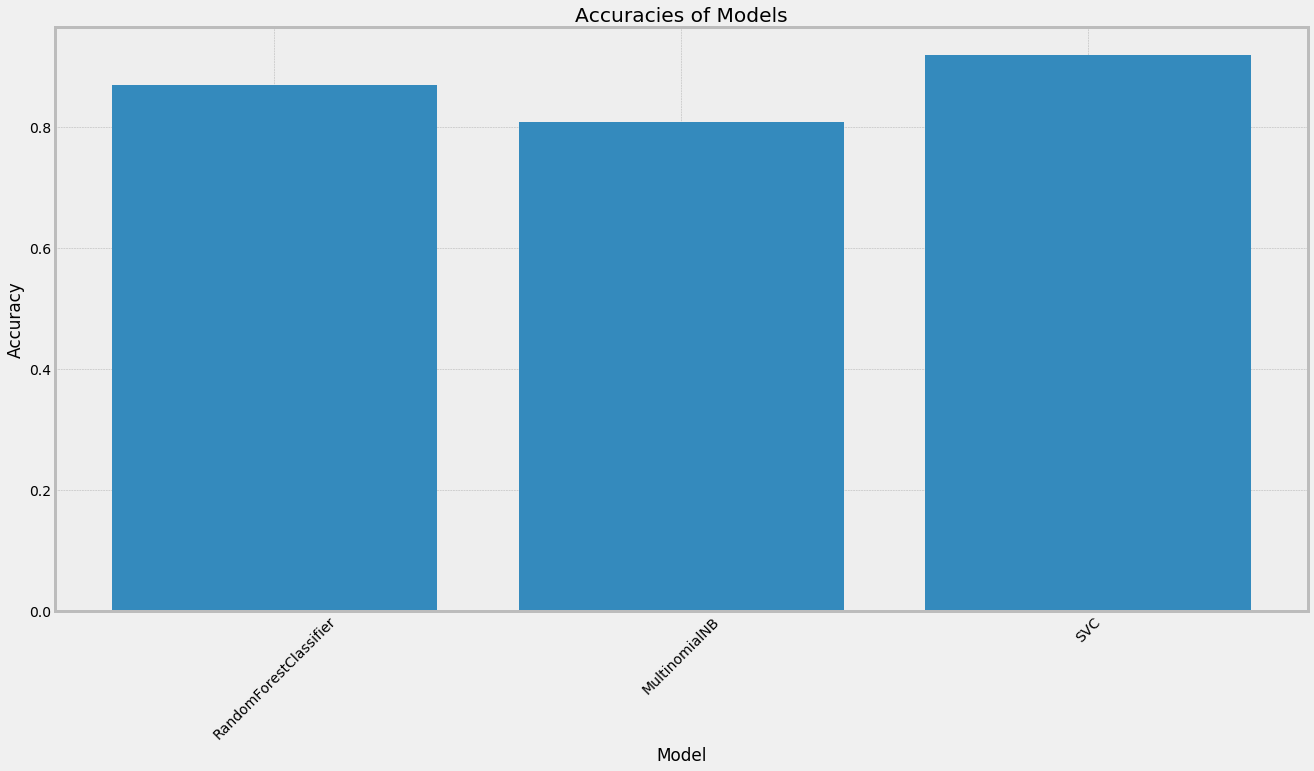

In [45]:
Index = [1,2,3]
plt.figure(1,figsize=(20, 10))
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
#for a,b in zip(Index, Accuracy):
#    plt.text(Index, Accuracy, str(Accuracy))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

SVM Linear gave the best accuracy with Count Vectoriser.

## 2. TFIDF

### TFIDF Vectorizer

TF-IDF is another way to convert textual data to a numeric form and is short for Term Frequency-Inverse Document Frequency. The vector value it yields is the product of these two terms; TF and IDF.

Let's first look at Term Frequency. We have already looked at term frequency above with count vectorizer, but this time, we need one more step to calculate the relative frequency. Let's say we have two documents in total as below.

1. I love dogs
2. I hate dogs and knitting

Relative term frequency is calculated for each term within each document as below.

$${TF(t,d)} = \frac {number\ of\ times\ term(t)\ appears\ in\ document(d)}{total\ number\ of\ terms\ in\ document(d)}$$

For example, if we calculate relative term frequency for 'I' in both document 1 and document 2, it will be as below.

$${TF('I',d1)} = \frac {1}{3} \approx {0.33}$$

$${TF('I',d2)} = \frac {1}{5} = {0.2}$$

Next, we need to get Inverse Document Frequency, which measures how important a word is to differentiate each document by following the calculation as below.

$${IDF(t,D)} = \log \Big(\frac {total\ number\ of\ documents(D)}{number\ of\ documents\ with\ the\ term(t)\ in\ it}\Big)$$

If we calculate inverse document frequency for 'I',

$${IDF('I',D)} = \log \Big(\frac {2}{2}\Big) = {0}$$

Once we have the values for TF and IDF, now we can calculate TFIDF as below.

$${TFIDF(t,d,D)} = {TF(t,d)}\cdot{IDF(t,D)}$$

Following the case of our example, TFIDF for term 'I' in both documents will be as below.

$${TFIDF('I',d1,D)} = {TF('I',d1)}\cdot{IDF('I',D)} = {0.33}\times{0} = {0}$$

$${TFIDF('I',d2,D)} = {TF('I',d2)}\cdot{IDF('I',D)} = {0.2}\times{0} = {0}$$

As you can see, the term 'I' appeared equally in both documents, and the TFIDF score is 0, which means the term is not really informative in differentiating documents. The rest is same as count vectorizer, TFIDF vectorizer will calculate these scores for terms in documents, and convert textual data into a numeric form.

---

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(min_df=2, sublinear_tf=True, max_df=0.98,
                                 stop_words='english')
train_features= v.fit_transform(train_clean_review)
test_features=v.transform(test_clean_review)

In [47]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(train_features,train['Polarity'])
    pred = fit.predict(test_features)
    accuracy = accuracy_score(pred,test['Polarity'])
    print("--------------------------------------------------------------")
    print('Accuracy of '+ classifier.__class__.__name__+'is '+str(accuracy))
    print("--------------------------------------------------------------")
    Accuracy.append(accuracy)
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(test['Polarity'], pred)))
    cm = confusion_matrix(test['Polarity'], pred)
    print("--------------------------------------------------------------")
    print("Confusion matrix:\n%s" % cm)
    Model.append(classifier.__class__.__name__)
    print("--------------------------------------------------------------")

Text(0.5,1,u'Accuracies of Models')

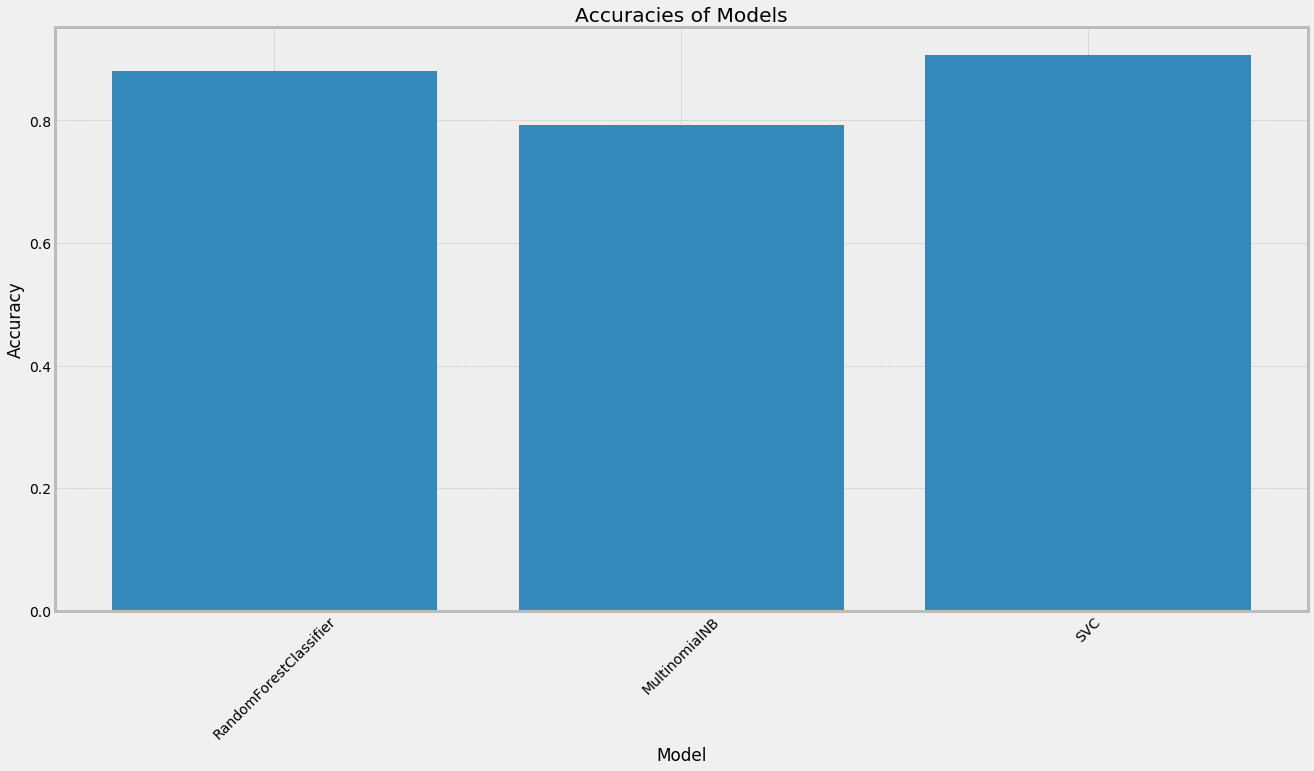

In [48]:
Index = [1,2,3]
plt.figure(1,figsize=(20, 10))
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
#for a,b in zip(Index, Accuracy):
#    plt.text(Index, Accuracy, str(Accuracy))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

---

##  3 - Using Bigram model as the feature

### Using Bigram Model with SVM Model

In [49]:
X_train, X_test, y_train, y_test = \
    train_test_split(text_data['clean_review'], text_data['Polarity'], test_size=0.3)
    
# Using Bigram Model with SVM Model
bigram_rf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   ngram_range=(2, 2),
                                   tokenizer=word_tokenize, 
                                   preprocessor=lambda text: text.replace("<br />", " "),)),
    ('classifier', RandomForestClassifier())
])

In [50]:
import nltk
nltk.download('punkt')

True

In [51]:
bigram_rf.fit(X_train, y_train)
y_pred_bigram = bigram_rf.predict(X_test)

Text(0.5,0,u'predicted label')

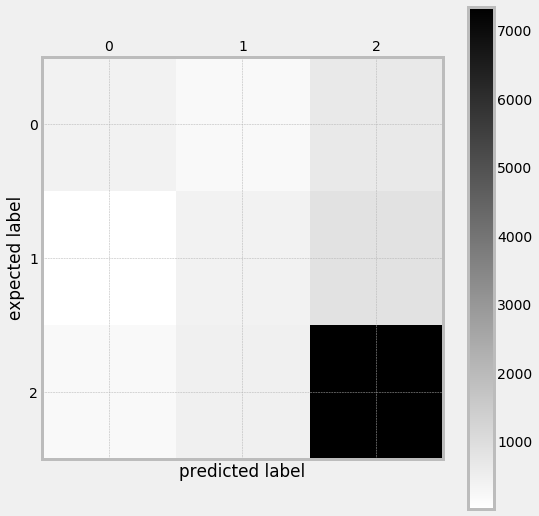

In [52]:
print("Accuracy and Confusion Matrix using SVM model with Bigram features")
print("=================================================================")
print('Accuracy', accuracy_score(y_test, y_pred_bigram))
print('Confusion matrix\n', confusion_matrix(y_test, y_pred_bigram))
print('(row=expected, col=predicted)')
plt.matshow(confusion_matrix(y_test, y_pred_bigram), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [53]:
confusion_matrix(y_test, y_pred_bigram)

array([[ 396,  203,  666],
       [  15,  408,  857],
       [ 198,  454, 7345]], dtype=int64)

### Using Bigram Model with NB Model

In [54]:
bigram_nb = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   ngram_range=(2, 2),
                                   tokenizer=word_tokenize, 
                                   preprocessor=lambda text: text.replace("<br />", " "),)),
    ('classifier', MultinomialNB())
])

In [55]:
bigram_nb.fit(X_train, y_train)
y_pred_bigram = bigram_nb.predict(X_test)

Text(0.5,0,u'predicted label')

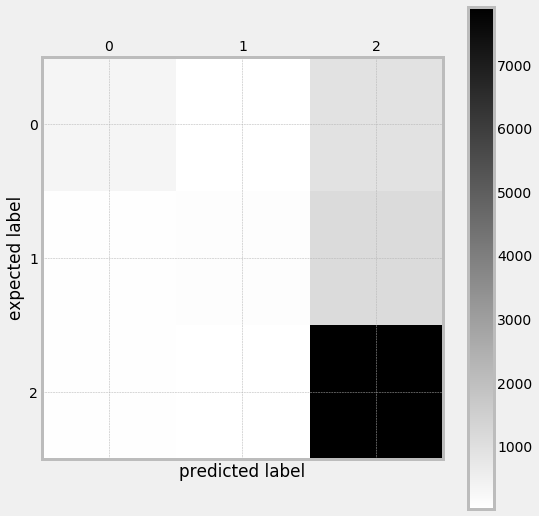

In [56]:
print("Accuracy and Confusion Matrix using NB model with Bigram features")
print("=================================================================")
print('Accuracy', accuracy_score(y_test, y_pred_bigram))
print('Confusion matrix\n', confusion_matrix(y_test, y_pred_bigram))
print('(row=expected, col=predicted)')
plt.matshow(confusion_matrix(y_test, y_pred_bigram), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [57]:
confusion_matrix(y_test, y_pred_bigram)

array([[ 324,   14,  927],
       [  59,   78, 1143],
       [  66,   18, 7913]], dtype=int64)

In [58]:
y_test.value_counts()

positive    7997
neutral     1280
negative    1265
Name: Polarity, dtype: int64

### Using Bigram Model with SVM Model

In [59]:
bigram_svm = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   ngram_range=(2, 2),
                                   tokenizer=word_tokenize, 
                                   preprocessor=lambda text: text.replace("<br />", " "),)),
    ('classifier', SVC(kernel='linear'))
])

In [ ]:
bigram_svm.fit(X_train, y_train)
y_pred_bigram = bigram_svm.predict(X_test)

Text(0.5,0,u'predicted label')

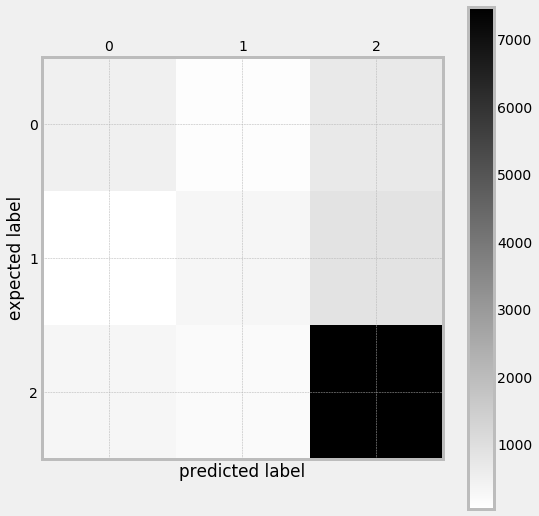

In [124]:
print("Accuracy and Confusion Matrix using SVM model with Bigram features")
print("=================================================================")
print('Accuracy', accuracy_score(y_test, y_pred_bigram))
print('Confusion matrix\n', confusion_matrix(y_test, y_pred_bigram))
print('(row=expected, col=predicted)')
plt.matshow(confusion_matrix(y_test, y_pred_bigram), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [125]:
confusion_matrix(y_test, y_pred_bigram)

array([[ 505,  106,  691],
       [  41,  310,  871],
       [ 329,  209, 7480]], dtype=int64)

---

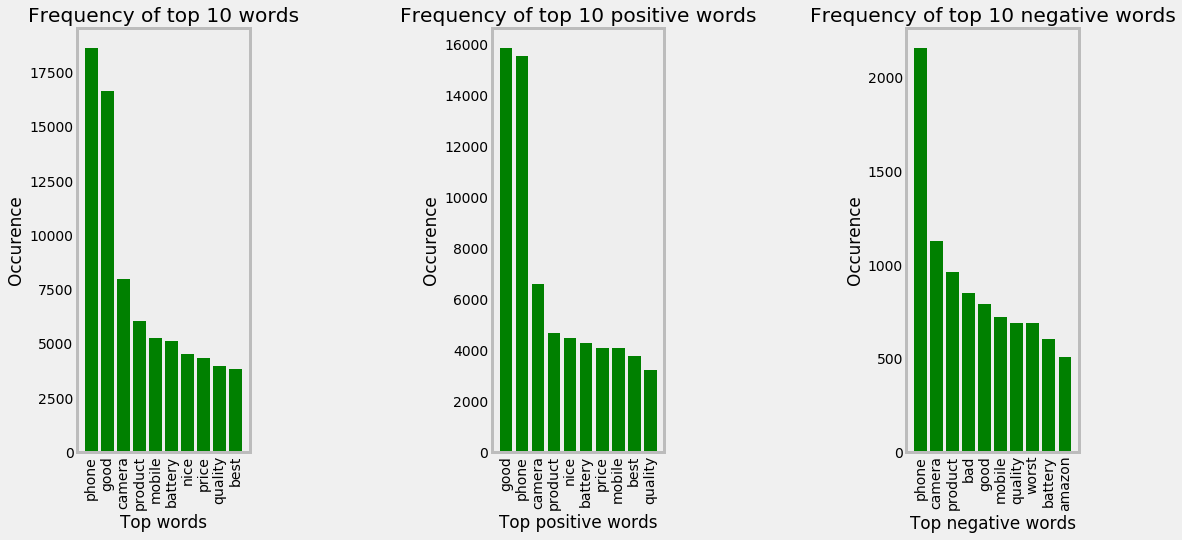

In [126]:
def print_top_words():    
    # Print top words
    vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    data_dtm = vect.fit_transform(text_data['text'].astype(str))
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top words
    topt = freq_tbl.sort_values(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_neg_words():    
    # Print top negative words
    vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    filt = text_data[text_data['Polarity'] == "negative"]
    data_dtm = vect.fit_transform(filt['text'].astype(str))
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top negative words
    topt = freq_tbl.sort_values(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top negative words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 negative words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_pos_words():    
    # Print top positive words
    vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    filt = text_data[text_data['Polarity'] == "positive"]
    data_dtm = vect.fit_transform(filt['text'].astype(str))
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top positive words
    topt = freq_tbl.sort_values(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top positive words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 positive words')
    plt.xticks(X,topt['Word'],rotation=90)


plt.figure(1,figsize=(16, 16))
plt.subplot(251)
print_top_words()  
plt.subplot(253)
print_top_pos_words()
plt.subplot(255)
print_top_neg_words()

### Using Grid Search CV for hyper parameter tuning of Random Forest Model/SVM

## Grid Searching
An important part of machine learning is known as hyper-parameter tuning. This is process of fitting the hyperparameters of your model to the training data.

As always one should also always be cautious of overfitting your data when hypertuning your model. We can circumvent this problem through crossvalidation.

Below, we use a grid search method, to iterate over various combinations of parameters for our different models to find the optimum, cross-validated set of hyperparameters for our data.

## Building Pipelines
Pipelines are useful tools when transforming data, and then fitting it. There is often a fixed series of steps from data to classifier training, and pipelines help this.

Interestingly, one can apply a number of transforms to the data and then apply a classifier. What's interesting, is that this can also be used in conjuction with GridSearcCV (which we applied earlier), to further tune our classifier, and the transformation stage.

Below, we build a pipeline for the RF classifier, but we include different preprocessing steps; for example, the selection between using only unigrams, or uni-, and bigrams; or estimators, max depth in classifier.

this is grid search - 3*3*4*7*5(cross validation) number of models will train below to find h best one, its time taking.

In [127]:
#3*3*4*7*5*

In [1]:
# you have to use this one, not the below one - thats for saving time.
params = {"tfidf__ngram_range": [(1, 1), (1, 2), (2,2)],
          "rf__n_estimators": [50,100,200],
          "rf__max_depth": [3,5,7,9],
          "rf__min_samples_split": [2,3,4,5,7,8,9]}

clf = Pipeline([("tfidf", TfidfVectorizer(sublinear_tf=True)),
                ("rf", RandomForestClassifier())])

gs = GridSearchCV(clf, params, verbose=2, n_jobs=-1, cv = 5)
gs.fit(train_clean_review, train.Polarity)
print(gs.best_estimator_)
print(gs.best_score_)

NameError: name 'Pipeline' is not defined

In [2]:
gs.best_estimator_

NameError: name 'gs' is not defined

In [79]:
test_predictions = gs.best_estimator_.predict(test_clean_review)

In [80]:
pd.Series(test_predictions).value_counts()

positive    10542
dtype: int64

In [82]:
test.Polarity.value_counts()

positive    625
neutral     120
negative     81
Name: Polarity, dtype: int64

Text(0.5,0,u'predicted label')

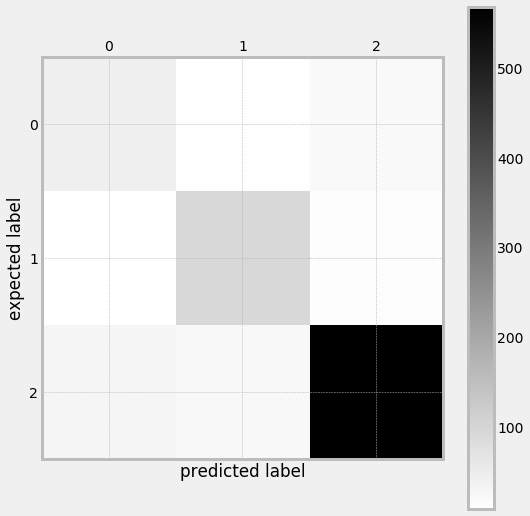

In [84]:
print("Accuracy and Confusion Matrix using SVM model with Grid Search CV")
print("=================================================================")
print('Accuracy', accuracy_score(test.Polarity, test_predictions))
print('Confusion matrix\n', confusion_matrix(test.Polarity, test_predictions))
print('(row=expected, col=predicted)')
plt.matshow(confusion_matrix(test.Polarity, test_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [ ]:
classification_report(test.Polarity, test_predictions)

In [85]:
accuracy_score(test.Polarity, test_predictions)

0.85956416464891039

85% accuracy 

---

In [50]:
text_data.head()

Polarity                                               text  length                                       clean_review
0  positive  Delivery was on time, product is legit with a ...     274  delivery time product legit proper indian warr...
1  positive  Product is good and I had paid through my cred...     376  product good paid credit card standard charter...
2  positive  Excellent phone. Light weight and classy. I wa...     321  excellent phone light weight classy worried re...
3  positive  Truly a class product by apple\nThe camera is ...     310  truly class product applenthe camera upto mark...
4  positive  Working super....its been over two months i am...     139  working superits two months using itbattery ba...

In [74]:
X_train, X_test, y_train, y_test = train_test_split(text_data['text'], text_data['Polarity'], random_state = 123, test_size = 0.3)

In [75]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    null_accuracy = 0.5
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return accuracy, train_test_time

In [84]:
cvec = CountVectorizer()
rf = RandomForestClassifier()
n_features = np.arange(100,6001,100)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train.values.astype('str'), y_train, X_test.values.astype('str'), y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [85]:
%%time
tvec = TfidfVectorizer()
print "RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

In [86]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

In [87]:
%%time
print "RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

Let's plot the results from count vectorizer together with TFIDF vectorizer.

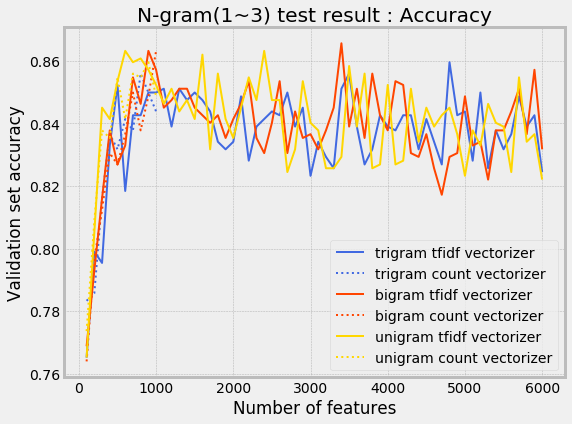

In [88]:
nfeatures_plot_tgtt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgtt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugtt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgtt.nfeatures, nfeatures_plot_tgtt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgtt.nfeatures, nfeatures_plot_bgtt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugtt.nfeatures, nfeatures_plot_ugtt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

From above chart, we can see including bigram and trigram boost the model performance both in count vectorizer and TFIDF vectorizer. And for every case of unigram to trigram, TFIDF yields better results than count vectorizer.

## Algorithms Comparison

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "Decision Tree", "Random Forest"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
    ]
zipped_clf = zip(names,classifiers)

In [94]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=1500, stop_words=None, ngram_range=(1, 2), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print "Validation result for {}".format(n)
        print c
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train.astype('str'), y_train, X_test.astype('str'), y_test)
        result.append((n,clf_accuracy,tt_time))
    return result

In [95]:
%%time
trigram_result = classifier_comparator(n_features=6000,ngram_range=(1,2))

In [98]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = RandomForestClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('rf', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Random Forest Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=6000,ngram_range=(1, 2))),
            ('classifier', clf)
        ])
    print "Validation result for {}".format(label)
    print clf
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train.astype('str'), y_train, X_test.astype('str'), y_test)

It seems like the voting classifier does no better than the RF model.

---